# Activity 6

In [0]:
# %tensorflow_version 1.x
# import numpy as np
# import tensorflow as tf

In [0]:
# def nback(n, k, length, random_state):
#     """Creates n-back task given n, number of digits k, and sequence length.
#     Given a sequence of integers xi, the sequence yi has yi[t] = if and
#     only if xi[t] == xi[t - n].
#     """
#     xi = random_state.randint(k, size=length) # Input sequence
#     yi = np.zeros(length, dtype=int) # Target sequence

#     for t in range(n, length):
#         yi[t] = (xi[t - n] == xi[t])

#     return xi, yi


# def nback_dataset(n_sequences, mean_length, std_length, n, k, random_state):
#     """Creates dataset composed of n-back tasks."""
#     X, Y, lengths = [], [], []

#     for _ in range(n_sequences):
#         # Choosing length for current task
#         length = random_state.normal(loc=mean_length, scale=std_length)
#         length = int(max(n + 1, length))

#         # Creating task
#         xi, yi = nback(n, k, length, random_state)

#         # Storing task
#         X.append(xi)
#         Y.append(yi)
#         lengths.append(length)

#     # Creating padded arrays for the tasks
#     max_len = max(lengths)
#     Xarr = np.zeros((n_sequences, max_len), dtype=np.int64)
#     Yarr = np.zeros((n_sequences, max_len), dtype=np.int64)

#     for i in range(n_sequences):
#         Xarr[i, 0: lengths[i]] = X[i]
#         Yarr[i, 0: lengths[i]] = Y[i]

#     return Xarr, Yarr, lengths

In [0]:
# seed = 0
# tf.reset_default_graph()
# tf.set_random_seed(seed=seed)

# # Task parameters
# n = 3 # n-back
# k = 4 # Input dimension
# mean_length = 20 # Mean sequence length
# std_length = 5 # Sequence length standard deviation
# n_sequences = 512 # Number of training/validation sequences

# # Creating datasets
# random_state = np.random.RandomState(seed=seed)
# X_train, Y_train, lengths_train = nback_dataset(n_sequences, mean_length, std_length, n, k, random_state)

# X_val, Y_val, lengths_val = nback_dataset(n_sequences, mean_length, std_length, n, k, random_state)

# # Model parameters
# hidden_units = 64 # Number of recurrent units
# # Training procedure parameters
# learning_rate = 1e-2
# n_epochs = 256
# # Model definition
# X_int = tf.placeholder(shape=[None, None], dtype=tf.int64)
# Y_int = tf.placeholder(shape=[None, None], dtype=tf.int64)
# lengths = tf.placeholder(shape=[None], dtype=tf.int64)

# batch_size = tf.shape(X_int)[0]
# max_len = tf.shape(X_int)[1]

# # One-hot encoding X_int
# X = tf.one_hot(X_int, depth=k) # shape: (batch_size, max_len, k)
# # One-hot encoding Y_int
# Y = tf.one_hot(Y_int, depth=2) # shape: (batch_size, max_len, 2)

# # Recurrent Neural Network
# cell = tf.nn.rnn_cell.BasicRNNCell(num_units=hidden_units)

# # Long-Short Term Memory Neural Network
# # There is a single change from the previous n-back example:
# # cell = tf.nn.rnn_cell.LSTMCell(num_units=hidden_units)

# init_state = cell.zero_state(batch_size, dtype=tf.float32)


# # rnn_outputs shape: (batch_size, max_len, hidden_units)
# rnn_outputs, \
#     final_state = tf.nn.dynamic_rnn(cell, X, sequence_length=lengths, initial_state=init_state)

# # rnn_outputs_flat shape: ((batch_size * max_len), hidden_units)
# rnn_outputs_flat = tf.reshape(rnn_outputs, [-1, hidden_units])

# # Weights and biases for the output layer
# Wout = tf.Variable(tf.truncated_normal(shape=(hidden_units, 2), stddev=0.1))
# bout = tf.Variable(tf.zeros(shape=[2]))

# # Z shape: ((batch_size * max_len), 2)
# Z = tf.matmul(rnn_outputs_flat, Wout) + bout

# Y_flat = tf.reshape(Y, [-1, 2]) # shape: ((batch_size * max_len), 2)

# # Creates a mask to disregard padding
# mask = tf.sequence_mask(lengths, dtype=tf.float32)
# mask = tf.reshape(mask, [-1]) # shape: (batch_size * max_len)

# # Network prediction
# pred = tf.argmax(Z, axis=1) * tf.cast(mask, dtype=tf.int64)
# pred = tf.reshape(pred, [-1, max_len]) # shape: (batch_size, max_len)

# hits = tf.reduce_sum(tf.cast(tf.equal(pred, Y_int), tf.float32))
# hits = hits - tf.reduce_sum(1 - mask) # Disregards padding

# # Accuracy: correct predictions divided by total predictions
# accuracy = hits/tf.reduce_sum(mask)

# # Loss definition (masking to disregard padding)
# loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y_flat, logits=Z)
# loss = tf.reduce_sum(loss*mask)/tf.reduce_sum(mask)

# optimizer = tf.train.AdamOptimizer(learning_rate)
# train = optimizer.minimize(loss)

In [0]:
# session = tf.Session()
# session.run(tf.global_variables_initializer())

# for e in range(1, n_epochs + 1):
#     feed = {X_int: X_train, Y_int: Y_train, lengths: lengths_train}
#     l, _ = session.run([loss, train], feed)
#     print('Epoch: {0}. Loss: {1}.'.format(e, l))

# feed = {X_int: X_val, Y_int: Y_val, lengths: lengths_val}
# accuracy_ = session.run(accuracy, feed)
# # print('Validation accuracy: {0}.'.format(accuracy_))

# # Shows first task and corresponding prediction
# xi = X_val[0, 0: lengths_val[0]]
# yi = Y_val[0, 0: lengths_val[0]]
# # print('Sequence:')
# # print(xi)
# # print('Ground truth:')
# # print(yi)
# # print('Prediction:')
# print(session.run(pred, {X_int: [xi], lengths: [len(xi)]})[0])

# session.close()

# Activity 7

## Book loading

In [0]:
%tensorflow_version 1.x
import io
import numpy as np
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
with io.open('drive/My Drive/_ USI/Deep Learning Lab/datasets/montecristo.txt', mode='r', encoding='utf-8') as f:
  book = f.read()
  
book

'\nProject Gutenberg\'s The Count of Monte Cristo, by Alexandre Dumas, père\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: The Count of Monte Cristo\n\nAuthor: Alexandre Dumas, père\n\nRelease Date: November 8, 2008 [EBook #1184]\nLast Updated: May 20, 2019\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK THE COUNT OF MONTE CRISTO ***\n\n\n\n\nProduced by Anonymous Project Gutenberg Volunteers, Dan Muller, and David Widger\n\n\n\nTHE COUNT OF MONTE CRISTO\n\n\n\nby Alexandre Dumas [père]\n\n\n\n\n\n0009m \n\n\n\n0011m \n\n\n\n0019m \n\n\n\nContents\n\n\n VOLUME ONE\nChapter 1. Marseilles—The Arrival\nChapter 2. Father and Son\nChapter 3. The Catalans\nChapter 4. Conspiracy\nChapter 5. The Marriage Feast\nChapter 6. The D

In [0]:
book = book.lower()

## Analysis

In [0]:
import pandas
from collections import Counter
from collections import OrderedDict

char_counts = Counter(book)

Characters count ordered alphabetically: OrderedDict([('\n', 61739), (' ', 420940), ('!', 1763), ('"', 22), ('#', 1), ('$', 3), ('%', 1), ('&', 56), ("'", 9), ('(', 148), (')', 148), ('*', 26), (',', 45246), ('-', 2239), ('.', 21950), ('/', 13), ('0', 1716), ('1', 657), ('2', 509), ('3', 396), ('4', 298), ('5', 442), ('6', 148), ('7', 223), ('8', 231), ('9', 220), (':', 318), (';', 5993), ('?', 4610), ('@', 1), ('[', 34), (']', 34), ('_', 1060), ('a', 165546), ('b', 27972), ('c', 52526), ('d', 94099), ('e', 259094), ('f', 45383), ('g', 35603), ('h', 126368), ('i', 142302), ('j', 2039), ('k', 12649), ('l', 80730), ('m', 57157), ('n', 137584), ('o', 157076), ('p', 34952), ('q', 2013), ('r', 121407), ('s', 126590), ('t', 180542), ('u', 60318), ('v', 21490), ('w', 43892), ('x', 3865), ('y', 42642), ('z', 1513), ('à', 11), ('â', 210), ('æ', 40), ('ç', 8), ('è', 1054), ('é', 1415), ('ê', 12), ('ë', 1), ('í', 1), ('î', 23), ('ï', 13), ('ô', 36), ('ü', 1), ('œ', 15), ('α', 4), ('δ', 2), ('ε', 

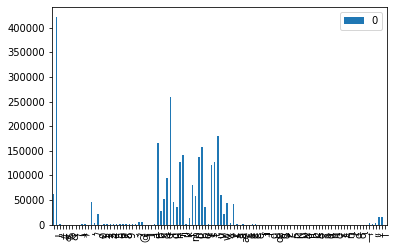

In [20]:
#### Characters distribution

char_counts_byletter = OrderedDict(sorted(char_counts.items()))
print(f'Characters count ordered alphabetically: {char_counts_byletter}')
df_char_counts_byletter = pandas.DataFrame.from_dict(char_counts_byletter, orient='index')
df_char_counts_byletter.plot(kind='bar')

Alphabet count: {'a': 165546, 'b': 27972, 'c': 52526, 'd': 94099, 'e': 259094, 'f': 45383, 'g': 35603, 'h': 126368, 'i': 142302, 'j': 2039, 'k': 12649, 'l': 80730, 'm': 57157, 'n': 137584, 'o': 157076, 'p': 34952, 'q': 2013, 'r': 121407, 's': 126590, 't': 180542, 'u': 60318, 'v': 21490, 'w': 43892, 'x': 3865, 'y': 42642, 'z': 1513}


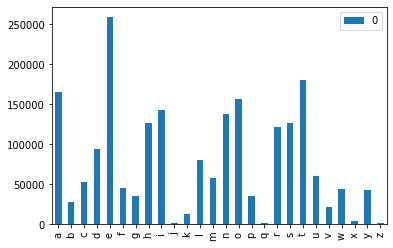

In [21]:
import string
char_counts_alphabet = dict((i, char_counts_byletter[i]) for i in list(string.ascii_lowercase))
print(f'Alphabet count: {char_counts_alphabet}')
df_char_counts_alphabet = pandas.DataFrame.from_dict(char_counts_alphabet, orient='index')
df_char_counts_alphabet.plot(kind='bar')

In [22]:
## Top characters
top = 20
print(f'Top {top} most common characters')
char_counts.most_common()[:top]

Top 20 most common characters


[(' ', 420940),
 ('e', 259094),
 ('t', 180542),
 ('a', 165546),
 ('o', 157076),
 ('i', 142302),
 ('n', 137584),
 ('s', 126590),
 ('h', 126368),
 ('r', 121407),
 ('d', 94099),
 ('l', 80730),
 ('\n', 61739),
 ('u', 60318),
 ('m', 57157),
 ('c', 52526),
 ('f', 45383),
 (',', 45246),
 ('w', 43892),
 ('y', 42642)]

## Machine Learning

### Pre-processing

In [0]:
#### Handle text to numerical conversion

vocab = sorted(set(book))
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

def text_to_num(text):
  return np.array([char2idx[c] for c in text])

def num_to_text(nums):
  return ''.join(idx2char[np.array(nums)])


# book = book.lower() # already done before analysis
book_to_num = text_to_num(book)

### Dataset generator

In [0]:
def generate_batches(source, batch_size, sequence_length):
  block_length = len(source) // batch_size

  batches = []
  for i in range(0, block_length, sequence_length):
    batch=[]

    for j in range(batch_size):
      start = j * block_length + i
      end = min(start + sequence_length, j * block_length + block_length)
      batch.append(source[start:end])

    batches.append(np.array(batch, dtype=int))

  return batches

In [31]:
## Little example
example_text = 'Mi chiamo Marco e sono un gattino.'.lower()
example_num = text_to_num(example_text)
print(example_text)
print(example_num)
print(generate_batches(example_num, 3, 2))

mi chiamo marco e sono un gattino.
[45 41  1 35 40 41 33 45 47  1 45 33 50 35 47  1 37  1 51 47 46 47  1 53
 46  1 39 33 52 52 41 46 47 14]
[array([[45, 41],
       [33, 50],
       [ 1, 53]]), array([[ 1, 35],
       [35, 47],
       [46,  1]]), array([[40, 41],
       [ 1, 37],
       [39, 33]]), array([[33, 45],
       [ 1, 51],
       [52, 52]]), array([[47,  1],
       [47, 46],
       [41, 46]]), array([[45],
       [47],
       [47]])]


In [0]:
#### Model parameters

batch_size = 16
sequence_length = 256
k = len(char_counts) # Input dimension (unique characters in the text)

hidden_units = 256 # Number of recurrent units
learning_rate = 1e-2
n_epochs = 5

In [34]:
### Creating dataset for training

bts = generate_batches(book_to_num, batch_size, sequence_length)
print('Number of batches', len(bts)) # ceiling(len(text) / batch_size / sequence_length)
print('Batch size', len(bts[0]))
print('Sequence length', len(bts[0][0]))

# # Just to notice that last batch is incomplete
# for i in range(len(bts)):
#   for j in range(batch_size):
#     if len(bts[i][j]) != 256:
#       print(len(bts[i][j]), i, j)

bts = np.array(bts[:-1]) # removing last batch because incomplete
print('\nbts shape: ' , bts.shape)

data_X = bts
data_Y = np.copy(data_X)

for batch in range(np.shape(bts)[0]):
  for sequence in range(np.shape(bts)[1]):
    for character in range(np.shape(bts)[2] - 1):
      data_Y[batch][sequence][character] = data_X[batch][sequence][character+1]
    data_Y[batch][sequence][np.shape(bts)[2] - 1] = 0 # last character has no target

print('data_X shape: ', data_X.shape)
print('data_Y shape: ', data_Y.shape)

Number of batches 647
Batch size 16
Sequence length 256

bts shape:  (646, 16, 256)
data_X shape:  (646, 16, 256)
data_Y shape:  (646, 16, 256)


### Network

In [35]:
### Model definition

seed = 0
tf.reset_default_graph()
tf.set_random_seed(seed=seed)

X_int = tf.placeholder(shape=[None, None], dtype=tf.int64)
Y_int = tf.placeholder(shape=[None, None], dtype=tf.int64)
lengths = tf.placeholder(shape=[None], dtype=tf.int64)

batch_size_tf = tf.shape(X_int)[0]
max_len = tf.shape(X_int)[1] # TODO

# One-hot encoding X_int
X = tf.one_hot(X_int, depth=k) # shape: (batch_size, max_len, k)
# One-hot encoding Y_int
Y = tf.one_hot(Y_int, depth=k) # shape: (batch_size, max_len, k)

# Recurrent Neural Network
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=hidden_units)

# Long-Short Term Memory Neural Network
rnn_layers = [tf.nn.rnn_cell.LSTMCell(size) for size in [256, 256]]
multi_rnn_cell = tf.nn.rnn_cell.MultiRNNCell(rnn_layers)
lstm_cell = tf.nn.rnn_cell.LSTMCell(num_units=hidden_units)

init_state = lstm_cell.zero_state(batch_size_tf, dtype=tf.float32)
current_state = lstm_cell.zero_state(batch_size_tf, dtype=tf.float32)

# rnn_outputs shape: (batch_size, max_len, hidden_units)
rnn_outputs, final_state = tf.nn.dynamic_rnn(lstm_cell, X, sequence_length=lengths, initial_state=current_state)

# rnn_outputs_flat shape: ((batch_size * max_len), hidden_units)
rnn_outputs_flat = tf.reshape(rnn_outputs, [-1, hidden_units])

# Weights and biases for the output layer
Wout = tf.Variable(tf.truncated_normal(shape=(hidden_units, k), stddev=0.1))
bout = tf.Variable(tf.zeros(shape=[k]))

# Z shape: ((batch_size * max_len), k)
Z = tf.matmul(rnn_outputs_flat, Wout) + bout

Y_flat = tf.reshape(Y, [-1, k]) # shape: ((batch_size * max_len), k)

# Creates a mask to disregard padding
mask = tf.sequence_mask(lengths, dtype=tf.float32)
mask = tf.reshape(mask, [-1]) # shape: (batch_size * max_len)

# Network prediction
pred = tf.squeeze(tf.random.categorical(Z, 1)) * tf.cast(mask, dtype=tf.int64)
pred = tf.reshape(pred, [-1, max_len]) # shape: (batch_size, max_len)

hits = tf.reduce_sum(tf.cast(tf.equal(pred, Y_int), tf.float32))
hits = hits - tf.reduce_sum(1 - mask) # Disregards padding

# Accuracy: correct predictions divided by total predictions
accuracy = hits/tf.reduce_sum(mask)

# Loss definition (masking to disregard padding)
loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y_flat, logits=Z)
loss = tf.reduce_sum(loss*mask)/tf.reduce_sum(mask)

optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Training

In [36]:
### Training
print('\n\n --- TRAINING --- \n')

session = tf.Session()
session.run(tf.global_variables_initializer())

for e in range(1, n_epochs + 1):
  cs = session.run(init_state, {X_int: data_X[0], Y_int: data_Y[0]}) # initial state
  
  for b in range(np.shape(data_X)[0]):
    c_input = data_X[b]
    c_target = data_Y[b]
    ls = list([np.shape(c_input)[1]] * np.shape(c_input)[0])
    feed = {X_int: data_X[b],
            Y_int: data_Y[b],
            lengths: ls, 
            current_state.c: cs.c, 
            current_state.h: cs.h}
    l, _, cs = session.run([loss, train, final_state], feed)
    print(f'Epoch {e}, Batch {b}. \t Loss: {l}')



 --- TRAINING --- 

Epoch 1, Batch 0. 	 Loss: 4.667132377624512
Epoch 1, Batch 1. 	 Loss: 4.3814592361450195
Epoch 1, Batch 2. 	 Loss: 3.337869644165039
Epoch 1, Batch 3. 	 Loss: 3.4048595428466797
Epoch 1, Batch 4. 	 Loss: 3.2471835613250732
Epoch 1, Batch 5. 	 Loss: 3.1670212745666504
Epoch 1, Batch 6. 	 Loss: 3.1346845626831055
Epoch 1, Batch 7. 	 Loss: 3.1358819007873535
Epoch 1, Batch 8. 	 Loss: 3.1019599437713623
Epoch 1, Batch 9. 	 Loss: 3.0476200580596924
Epoch 1, Batch 10. 	 Loss: 3.075864791870117
Epoch 1, Batch 11. 	 Loss: 3.0801262855529785
Epoch 1, Batch 12. 	 Loss: 3.0375704765319824
Epoch 1, Batch 13. 	 Loss: 3.068936824798584
Epoch 1, Batch 14. 	 Loss: 3.0439720153808594
Epoch 1, Batch 15. 	 Loss: 3.0779693126678467
Epoch 1, Batch 16. 	 Loss: 3.0367636680603027
Epoch 1, Batch 17. 	 Loss: 3.02773380279541
Epoch 1, Batch 18. 	 Loss: 2.989903688430786
Epoch 1, Batch 19. 	 Loss: 3.108295202255249
Epoch 1, Batch 20. 	 Loss: 2.9798755645751953
Epoch 1, Batch 21. 	 Loss: 2.9

In [54]:
### Model save

saver = tf.train.Saver()
saver.save(session, 'drive/My Drive/_ USI/Deep Learning Lab/models/Activity7Model_1.ckpt')

'drive/My Drive/_ USI/Deep Learning Lab/models/Activity7Model_1.ckpt'

### Text generation

In [60]:
### Text generation

import random
import itertools

for n in range(20):
  ri = random.randrange(sum(char_counts.values()))
  starting_char = next(itertools.islice(char_counts.elements(), ri, None))

  gen_input = [text_to_num(starting_char)] # starting character
  gen_lengths = [1] # generation is done character by character
  cs = session.run(init_state, {X_int: gen_input}) # initial state

  gen_text = [gen_input[0][0]] # store the generated text
  for i in range(255):
    cs, gen_input = session.run([final_state, pred], {X_int: gen_input, lengths: gen_lengths, current_state: cs})
    gen_text.append(gen_input[0][0]) 

  print(f'\n\n------- EXAMPLE {n+1} -------\n')
  print(num_to_text(gen_text))



------- EXAMPLE 1 -------

, and we self-slucces me who had come, monte cristo with a few
man seems commanded look at
his restrainly?
it was called to franz. but his demand with which it will melled on which is less, down notaxe by an usual
exposed; and noive
stones his rood.

th
se


------- EXAMPLE 2 -------

and
so stese
of the mark, which not with monte cristo naturally through his
father; and protectate the crother walk outwowe the stanus furd costreel for which at the even of from the wipht of accusations with loving his fore
of the window towards, and dram


------- EXAMPLE 3 -------

astreated, in the dipphive house, with the natural tolfors will a wampable clothess, as you will see; and of mentions is which well, they named 
there was bestowed the riced, who happens of stone pain of the
apartments has been steps. you
had lass yourself


------- EXAMPLE 4 -------

eth-possesss with the recollectionate excrove. his hands no one coloréere;
“but i have came to see that the latte

### Saved model

In [59]:
### Restore from model
# https://stackoverflow.com/questions/33759623/tensorflow-how-to-save-restore-a-model
# https://stackoverflow.com/questions/40442098/saving-and-restoring-a-trained-lstm-in-tensor-flow

saver = tf.train.Saver()

with tf.Session() as sess:
  saver.restore(sess, 'drive/My Drive/_ USI/Deep Learning Lab/models/Activity7Model_1.ckpt')
  print('Model restored.')

  ri = random.randrange(sum(char_counts.values()))
  starting_char = next(itertools.islice(char_counts.elements(), ri, None))

  gen_input = [text_to_num(starting_char)] # starting character
  gen_lengths = [1] # generation is done character by character
  cs = session.run(init_state, {X_int: gen_input}) # initial state

  gen_text = [gen_input[0][0]] # store the generated text
  for i in range(255):
    cs, gen_input = session.run([final_state, pred], {X_int: gen_input, lengths: gen_lengths, current_state: cs})
    gen_text.append(gen_input[0][0]) 

  print(f'\n\n------- EXAMPLE -------\n')
  print(num_to_text(gen_text))

INFO:tensorflow:Restoring parameters from drive/My Drive/_ USI/Deep Learning Lab/models/Activity7Model_1.ckpt
Model restored.


------- EXAMPLE -------

nken daughio
strow; bring creemal apartment immedinit one who effort.s look
two or real do when his pyrable was followed by exceptional
riches
her ornetic
open folder from hurry 
when monte cristo.

“nobody.”

“well?” asked bertuick her one of the gone, “b
